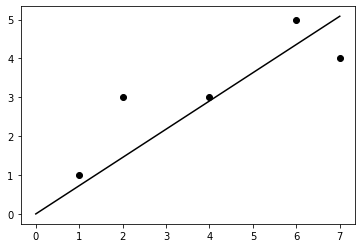

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def reg1dim1(x, y):
    a = np.dot(x, y) / (x**2).sum()
    return a

x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
a = reg1dim1(x, y)

plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color="k")
plt.show()

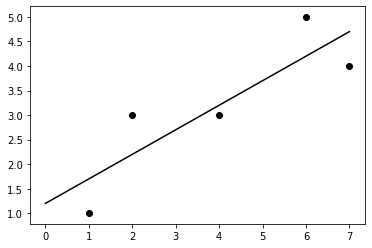

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def reg1dim2(x, y):
    n = len(x)
    a = ((np.dot(x, y) - y.sum() * x.sum() / n) / ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum()) / n
    return a, b

x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
a, b = reg1dim2(x, y)

plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, a * xmax + b], color="k")
plt.show()

In [3]:
import numpy as np
from scipy import linalg

class LinearRegression:
    def __init__(self):
        self.w_ = None
    
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
    
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

係数: [1.11450326 1.95737004 3.00295751]
(1,1)に対する予測値 [6.07483081]


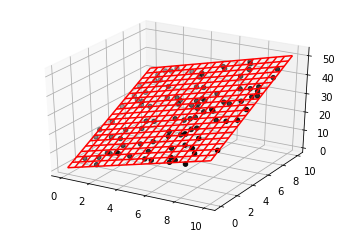

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n,2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0]  + w2 * X[:, 1] + np.random.randn(n)

model = LinearRegression()
model.fit(X, y)
print("係数:", model.w_)
print("(1,1)に対する予測値", model.predict(np.array([1,1])))

xmesh,ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')
plt.show()


In [5]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [6]:
import numpy as np
import csv

Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

# learning
model = LinearRegression()
model.fit(train_X, train_y)

y = model.predict(test_X)

print("最初の5つの正解と予測:")
for i in range(5):
    print( "{:1.0f} {:5.3f}".format(test_y[i], y[i]) )
    
print()
print("RMSE:", np.sqrt(((test_y - y)**2).mean()))

最初の5つの正解と予測:
7 6.012
6 5.734
5 5.285
8 6.352
5 5.414

RMSE: 0.6724248548469225


In [7]:
# ridge
class RidgeRegression:
    def __init__(self, lambda_ = 1.):
        self.lambda_ = lambda_
        self.w_ = None
    
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        c = np.eye(Xtil.shape[1])
        A = np.dot(Xtil.T, Xtil) + self.lambda_ * c
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
    
    def predict(self, X):
        Xtil = np.c_[np.ones(X.shape(0), X)]
        return np.dot(Xtil, self.w_)

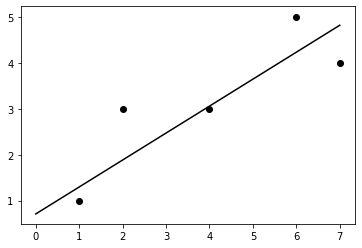

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])
model = RidgeRegression(1.)
model.fit(x, y)
b, a = model.w_

plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [b, b + a * xmax], color='k')
plt.show()

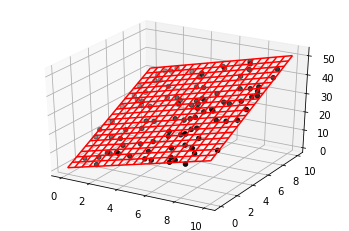

In [9]:

n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n,2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0]  + w2 * X[:, 1] + np.random.randn(n)

model = RidgeRegression(1.)
model.fit(X, y)


xmesh,ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')
plt.show()


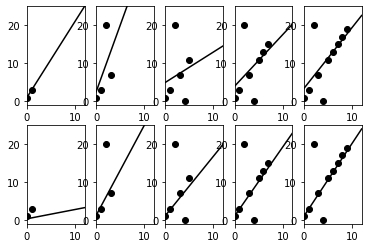

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(12)
y = 1 + 2 * x
y[2] = 20
y[4] = 0

xmin = 0
xmax = 12
ymin = -1
ymax = 25
fig, axes = plt.subplots(nrows=2, ncols=5)
for i in range(5):
    axes[0,i].set_xlim([xmin, xmax])
    axes[0,i].set_ylim([ymin, ymax])
    
    axes[1,i].set_xlim([xmin, xmax])
    axes[1,i].set_ylim([ymin, ymax])
    xx = x[:2 + i * 2]
    yy = y[:2 + i * 2]
    axes[0,i].scatter(xx, yy, color='k')
    axes[1,i].scatter(xx, yy, color='k')
    model = LinearRegression()
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0] + model.w_[1] * xmin, model.w_[0] + model.w_[1] * xmax]
    axes[0,i].plot(xs, ys, color='k')
    model = RidgeRegression(10.)
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0] + model.w_[1] * xmin, model.w_[0] + model.w_[1] * xmax]
    axes[1,i].plot(xs, ys, color='k')

plt.show()

In [11]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        
    def fit(self, x, y):
        x_pow = []
        xx = x.reshape(len(x), 1)
        for i in range(1, self.degree + 1):
            x_pow.append(xx**i)
        mat = np.concatenate(x_pow, axis=1)
        linreg = LinearRegression()
        linreg.fit(mat, y)
        self.w_ = linreg.w_
    
    def predict(self, x):
        r = 0
        for  i in range(self.degree + 1):
            r += x**i * self.w_[i]
        return r

/usr/local/var/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=3.44759e-31): result may not be accurate.
  if sys.path[0] == '':


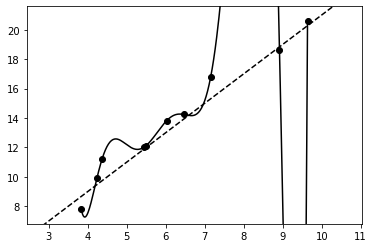

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
def f(x):
    return 1 + 2 * x

x = np.random.random(10) * 10
y = f(x) + np.random.randn(10)

model = PolynomialRegression(10)
model.fit(x, y)

plt.scatter(x, y, color='k')
plt.ylim([y.min()-1, y.max()+1])
xx = np.linspace(x.min(), x.max(), 300)
yy = np.array([model.predict(u) for u in xx])
plt.plot(xx, yy, color='k')

model = LinearRegression()
model.fit(x, y)
b, a = model.w_
x1 = x.min() -1
x2 = x.max() +1
plt.plot([x1,x2], [f(x1), f(x2)], color='k', linestyle='dashed')

plt.show()

## バイアスとバリアンス
正確だけど, 未知データに対して誤差が大きすぎると良くない.
バイアスはどれくらい予測できるか
バリアンスはデータが変わったらどれくらい予測値がばらつくか

バリアンスが大きければ, 未知データに対して弱いようなモデルになっている.

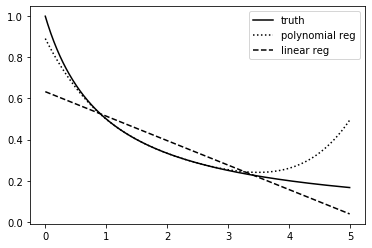

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

def f(x):
    return 1 / (1 + x)

def sample(n):
    x = np.random.random(n) * 5
    y = f(x)
    return x, y

xx = np.arange(0, 5, 0.01)
np.random.seed(0)
y_poly_sum = np.zeros(len(xx))
y_lin_sum = np.zeros(len(xx))
n = 100000
warnings.filterwarnings('ignore')
for _ in range(n):
    x, y = sample(5)
    poly = PolynomialRegression(4)
    poly.fit(x, y)
    lin = LinearRegression()
    lin.fit(x, y)
    y_poly = poly.predict(xx)
    y_poly_sum += y_poly
    y_lin = lin.predict(xx.reshape(-1, 1))
    y_lin_sum += y_lin

plt.plot(xx, f(xx), label="truth", color='k', linestyle='solid')
plt.plot(xx, y_poly_sum/n, label="polynomial reg", color='k', linestyle='dotted')
plt.plot(xx, y_lin_sum/n, label="linear reg", color='k', linestyle='dashed')

plt.legend()
plt.show()

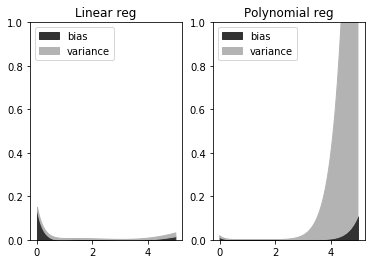

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

def f(x):
    return 1 / (1 + x)

def sample(n):
    x = np.random.random(n) * 5
    y = f(x)
    return x, y

xx = np.arange(0, 5, 0.01)
np.random.seed(0)
y_poly_sum = np.zeros(len(xx))
y_poly_sum_sq = np.zeros(len(xx))
y_lin_sum = np.zeros(len(xx))
y_lin_sum_sq = np.zeros(len(xx))
y_true = f(xx)
n = 100000
warnings.filterwarnings('ignore')
for _ in range(n):
    x, y = sample(5)
    poly = PolynomialRegression(4)
    poly.fit(x, y)
    lin = LinearRegression()
    lin.fit(x, y)
    y_poly = poly.predict(xx)
    y_poly_sum += y_poly
    y_poly_sum_sq += (y_poly - y_true)**2
    y_lin = lin.predict(xx.reshape(-1, 1))
    y_lin_sum += y_lin
    y_lin_sum_sq += (y_lin - y_true)**2

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Linear reg")
ax2.set_title("Polynomial reg")
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.fill_between(xx, 0, (y_lin_sum/n - y_true)**2, color='0.2', label='bias')
ax1.fill_between(xx, (y_lin_sum/n - y_true)**2, y_lin_sum_sq / n, color='0.7', label='variance')
ax1.legend(loc="upper left")
ax2.fill_between(xx, 0, (y_poly_sum/n - y_true)**2, color='0.2', label='bias')
ax2.fill_between(xx, (y_poly_sum/n - y_true)**2, y_poly_sum_sq / n, color='0.7', label='variance')
ax2.legend(loc='upper left')


plt.show()

## ラッソ回帰

In [15]:
import numpy as np

def soft_thresholding(x, y):
    return np.sign(x) * max(abs(x) - y, 0)

class Lasso:
    def __init__(self, lambda_, tol=0.0001, max_iter=1000):
        self.lambda_ = lambda_
        self.tol = tol
        self.max_iter = max_iter
        self.w_ = None
    
    def fit(self, X, t):
        n, d = X.shape
        self.w_ = np.zeros(d + 1)
        avgl1 = 0.
        for _ in range(self.max_iter):
            avgl1_prev = avgl1
            self._update(n, d, X, t)
            avgl1 = np.abs(self.w_).sum() / self.w_.shape[0]
            if abs(avgl1 - avgl1_prev) <= self.tol:
                break
    
    def _update(self, n, d, X, t):
        self.w_[0] = (t - np.dot(X, self.w_[1:])).sum() / n
        w0vec = np.ones(n) * self.w_[0]
        for k in range(d):
            ww = self.w_[1:]
            ww[k] = 0
            q = np.dot(t - w0vec - np.dot(X, ww), X[:, k])
            r = np.dot(X[:, k], X[:, k])
            self.w_[k+1] = soft_thresholding(q/r, self.lambda_)
    
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(X.shape[0], 1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [16]:
import numpy as np
import csv

Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

for lambda_ in [1., 0.1, 0.01]:
    model = Lasso(lambda_)
    model.fit(train_X, train_y)
    y = model.predict(test_X)
    print("--- lambda: {} ---".format(lambda_))
    print("coefficients:")
    print(model.w_)
    mse = ((y-test_y)**2).mean()
    print("MSE: {:.3f}".format(mse))

--- lambda: 1.0 ---
coefficients:
[ 5.58430718  0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.        ]
MSE: 0.691
--- lambda: 0.1 ---
coefficients:
[ 5.73493612  0.         -0.1407455   0.34369322 -0.         -2.00071813
  0.         -0.         -0.          0.          0.          0.        ]
MSE: 0.636
--- lambda: 0.01 ---
coefficients:
[ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]
MSE: 0.539


## ロジスティック回帰

In [17]:
import numpy as np
from scipy import linalg

THRESHMIN = 1e-10

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, tol=0.001, max_iter=3, random_seed=0):
        self.tol = tol
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)
        self.w_ = None
    
    def fit(self, X, y):
        self.w_ = self.random_state.randn(X.shape[1]+1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        diff = np.inf
        w_prev = self.w_
        iter = 0
        while diff > self.tol and iter < self.max_iter:
            yhat = sigmoid(np.dot(Xtil, self.w_))
            r = np.clip(yhat * (1 - yhat), THRESHMIN, np.inf)
            XR = Xtil.T * r
            XRX = np.dot(Xtil.T * r, Xtil)
            w_prev = self.w_
            b = np.dot(XR, np.dot(Xtil, self.w_) - 1 / r * (yhat - y))
            self.w_ = linalg.solve(XRX, b)
            diff = abs(w_prev - self.w_).mean()
            iter += 1
        
    def predict(self, X):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        yhat = sigmoid(np.dot(Xtil, self.w_))
        return np.where(yhat > .5, 1, 0)

In [18]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

In [19]:
import csv
import numpy as np

n_test = 100
X = []
y = []
with open("wdbc.data") as fp:
    for row in csv.reader(fp):
        if row[1] == "B":
            y.append(0)
        else:
            y.append(1)
        X.append(row[2:])

y = np.array(y, dtype=np.float64)
X = np.array(X, dtype=np.float64)
y_train = y[:-n_test]
X_train = X[:-n_test]
y_test = y[-n_test:]
X_test = X[-n_test:]
model = LogisticRegression(tol=0.01)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
n_hits = (y_test == y_predict).sum()
print("Accuracy: {}/{} = {}".format(n_hits, n_test, n_hits/n_test))

Accuracy: 97/100 = 0.97
